In [17]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from pytesseract import Output
import cv2

pytesseract.pytesseract.tesseract_cmd = r'D:\Apps\Tesseract-OCR\tesseract.exe'

simage = r'Tesseract/image_2.png'
img = cv2.imread(simage)
d = pytesseract.image_to_data(img, output_type=Output.DICT)

NbBoites = len(d['level'])
print("Nombre de boites: " + str(NbBoites))
for i in range(NbBoites):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img,', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Nombre de boites: 16


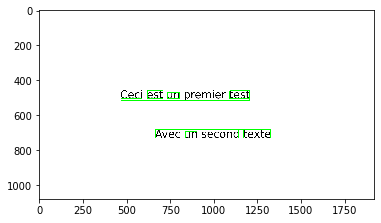

In [18]:
from matplotlib import pyplot as plt
plt.imshow(img)

In [28]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def remove_noise(image):
    return cv2.medianBlur(image, 5)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def dilate(image):
    kernel = np.ones((5, 5), np.unit8)
    return cv2.dilate(image, kernel, iterations = 1)

def erode(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

def opening(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def canny(image):
    return cv2.Canny(image, 100, 200)

def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = - angle
    (h, w) = image.shape[:2]
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

jour ceci est un test


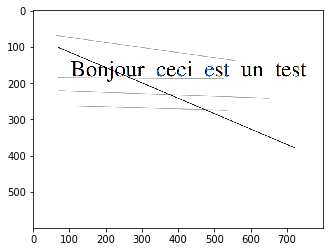

In [29]:
simage2 = r'Tesseract/image_4.png'
image2_original = cv2.imread(simage2)
print(pytesseract.image_to_string(image2_original))
plt.imshow(image2_original, 'gray')

Bonjour ceci est un test


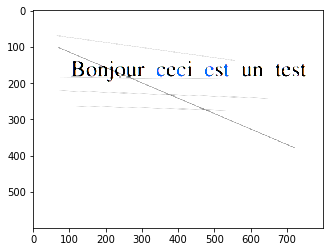

In [30]:
retouche3 = remove_noise(image2_original)
print(pytesseract.image_to_string(retouche3))
plt.imshow(retouche3)

Bomjour ceci est un test


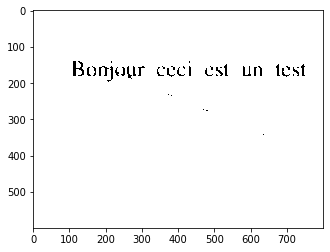

In [32]:
retouche4 = thresholding(grayscale(remove_noise(image2_original)))
print(pytesseract.image_to_string(retouche4))
plt.imshow(retouche4, 'gray')

In [ ]:
from pdf2image import convert_from_path, convert_from_bytes
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from pytesseract import Output
images = convert_from_path('Facture.pdf')
print("Nombre de pages : " + str(len(images)))
for i in range(len(images)):
    print("Page N°" + str(i+1) + "\n")
    print(pytesseract.image_to_string(images[i]))